In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import main

In [2]:
agg_dict = main.create_rel_df(500)

{'age': {'18-24 years': 61, '25-45 years': 211, '45-60 years': 146, '60+ years': 82}, 'driving_hist_dui': {'No': 251, 'Yes': 249}, 'driving_hist_reckless': {'No': 269, 'Yes': 231}, 'driving_hist_speeding': {'No': 238, 'Yes': 262}, 'credit_score': {'300-579': 65, '580-669': 146, '670-739': 154, '740-799': 90, '800-850': 45}, 'driving_exp': {'less than 1 year': 124, '1-5 years': 113, '6-15 years': 131, '15+ years': 132}, 'location': {'Urban': 162, 'Rural': 176, 'Suburban': 162}, 'insurance_hist': {'No coverage': 167, 'Coverage (past 6 months)': 333, 'Coverage (past 1 year)': 0}, 'annual_mileage': {'0-7500 miles': 118, '7500-10000 miles': 126, '10001-15000 miles': 128, '15000+ miles': 128}, 'marital_status': {'Married': 248, 'Single/Divorced/Widowed': 252}, 'claims_hist': {'Filed within last 1 year': 166, 'Filed within last 1-3 years': 161, 'No claims filed': 173}, 'coverage_level': {'25000': 96, '50000': 107, '100000': 101, '200000': 112, '300000': 84}, 'deductible': {'No deductible': 11

In [20]:
data = pd.read_csv('test.csv', usecols=["Age", "Driving_History_DUI", "Driving_History_reckless","Driving_History_speeding","Credit_Score",
                                        "Years_of_Driving","Location","Insurance_History","Annual_Mileage","Marital_Status","Claims_History",
                                        "Coverage_level", "Deductible", "Vehicle", "Combine_relativity_per_customer", "Premium", "Threshold_premium", "Customer_dropped"])
data.head()

,Age,Driving_History_DUI,Driving_History_reckless,Driving_History_speeding,Credit_Score,Years_of_Driving,Location,Insurance_History,Annual_Mileage,Marital_Status,Claims_History,Coverage_level,Deductible,Vehicle,Combine_relativity_per_customer,Premium,Threshold_premium,Customer_dropped
0,1.00,1.0,1.0,1.00,1.10,1.00,1.05,1.05,1.20,0.95,1.25,1.5,0.9,1.05,2.395242,4282.387020,5120,0
1,1.00,1.0,1.0,1.00,0.95,0.97,0.97,1.05,1.00,0.95,1.25,1.6,0.8,0.90,1.994182,3640.691244,4200,0
2,1.25,1.2,1.1,1.00,1.20,1.10,1.00,1.20,1.00,1.00,1.00,1.5,1.0,0.95,3.148032,5486.851512,6800,0
3,1.15,1.0,1.0,1.05,0.88,1.05,1.00,1.20,1.20,1.00,1.15,1.5,0.9,1.15,2.247484,4045.974413,5120,0
4,1.00,1.2,1.0,1.05,1.00,1.05,1.00,1.05,1.15,0.95,1.15,1.0,1.2,0.95,1.083259,2183.214996,4200,0


In [21]:
data.shape

(500, 18)

/var/folders/16/pl2gmcd12697tr32vh86072w0000gn/T/ipykernel_76370/1306990064.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax);


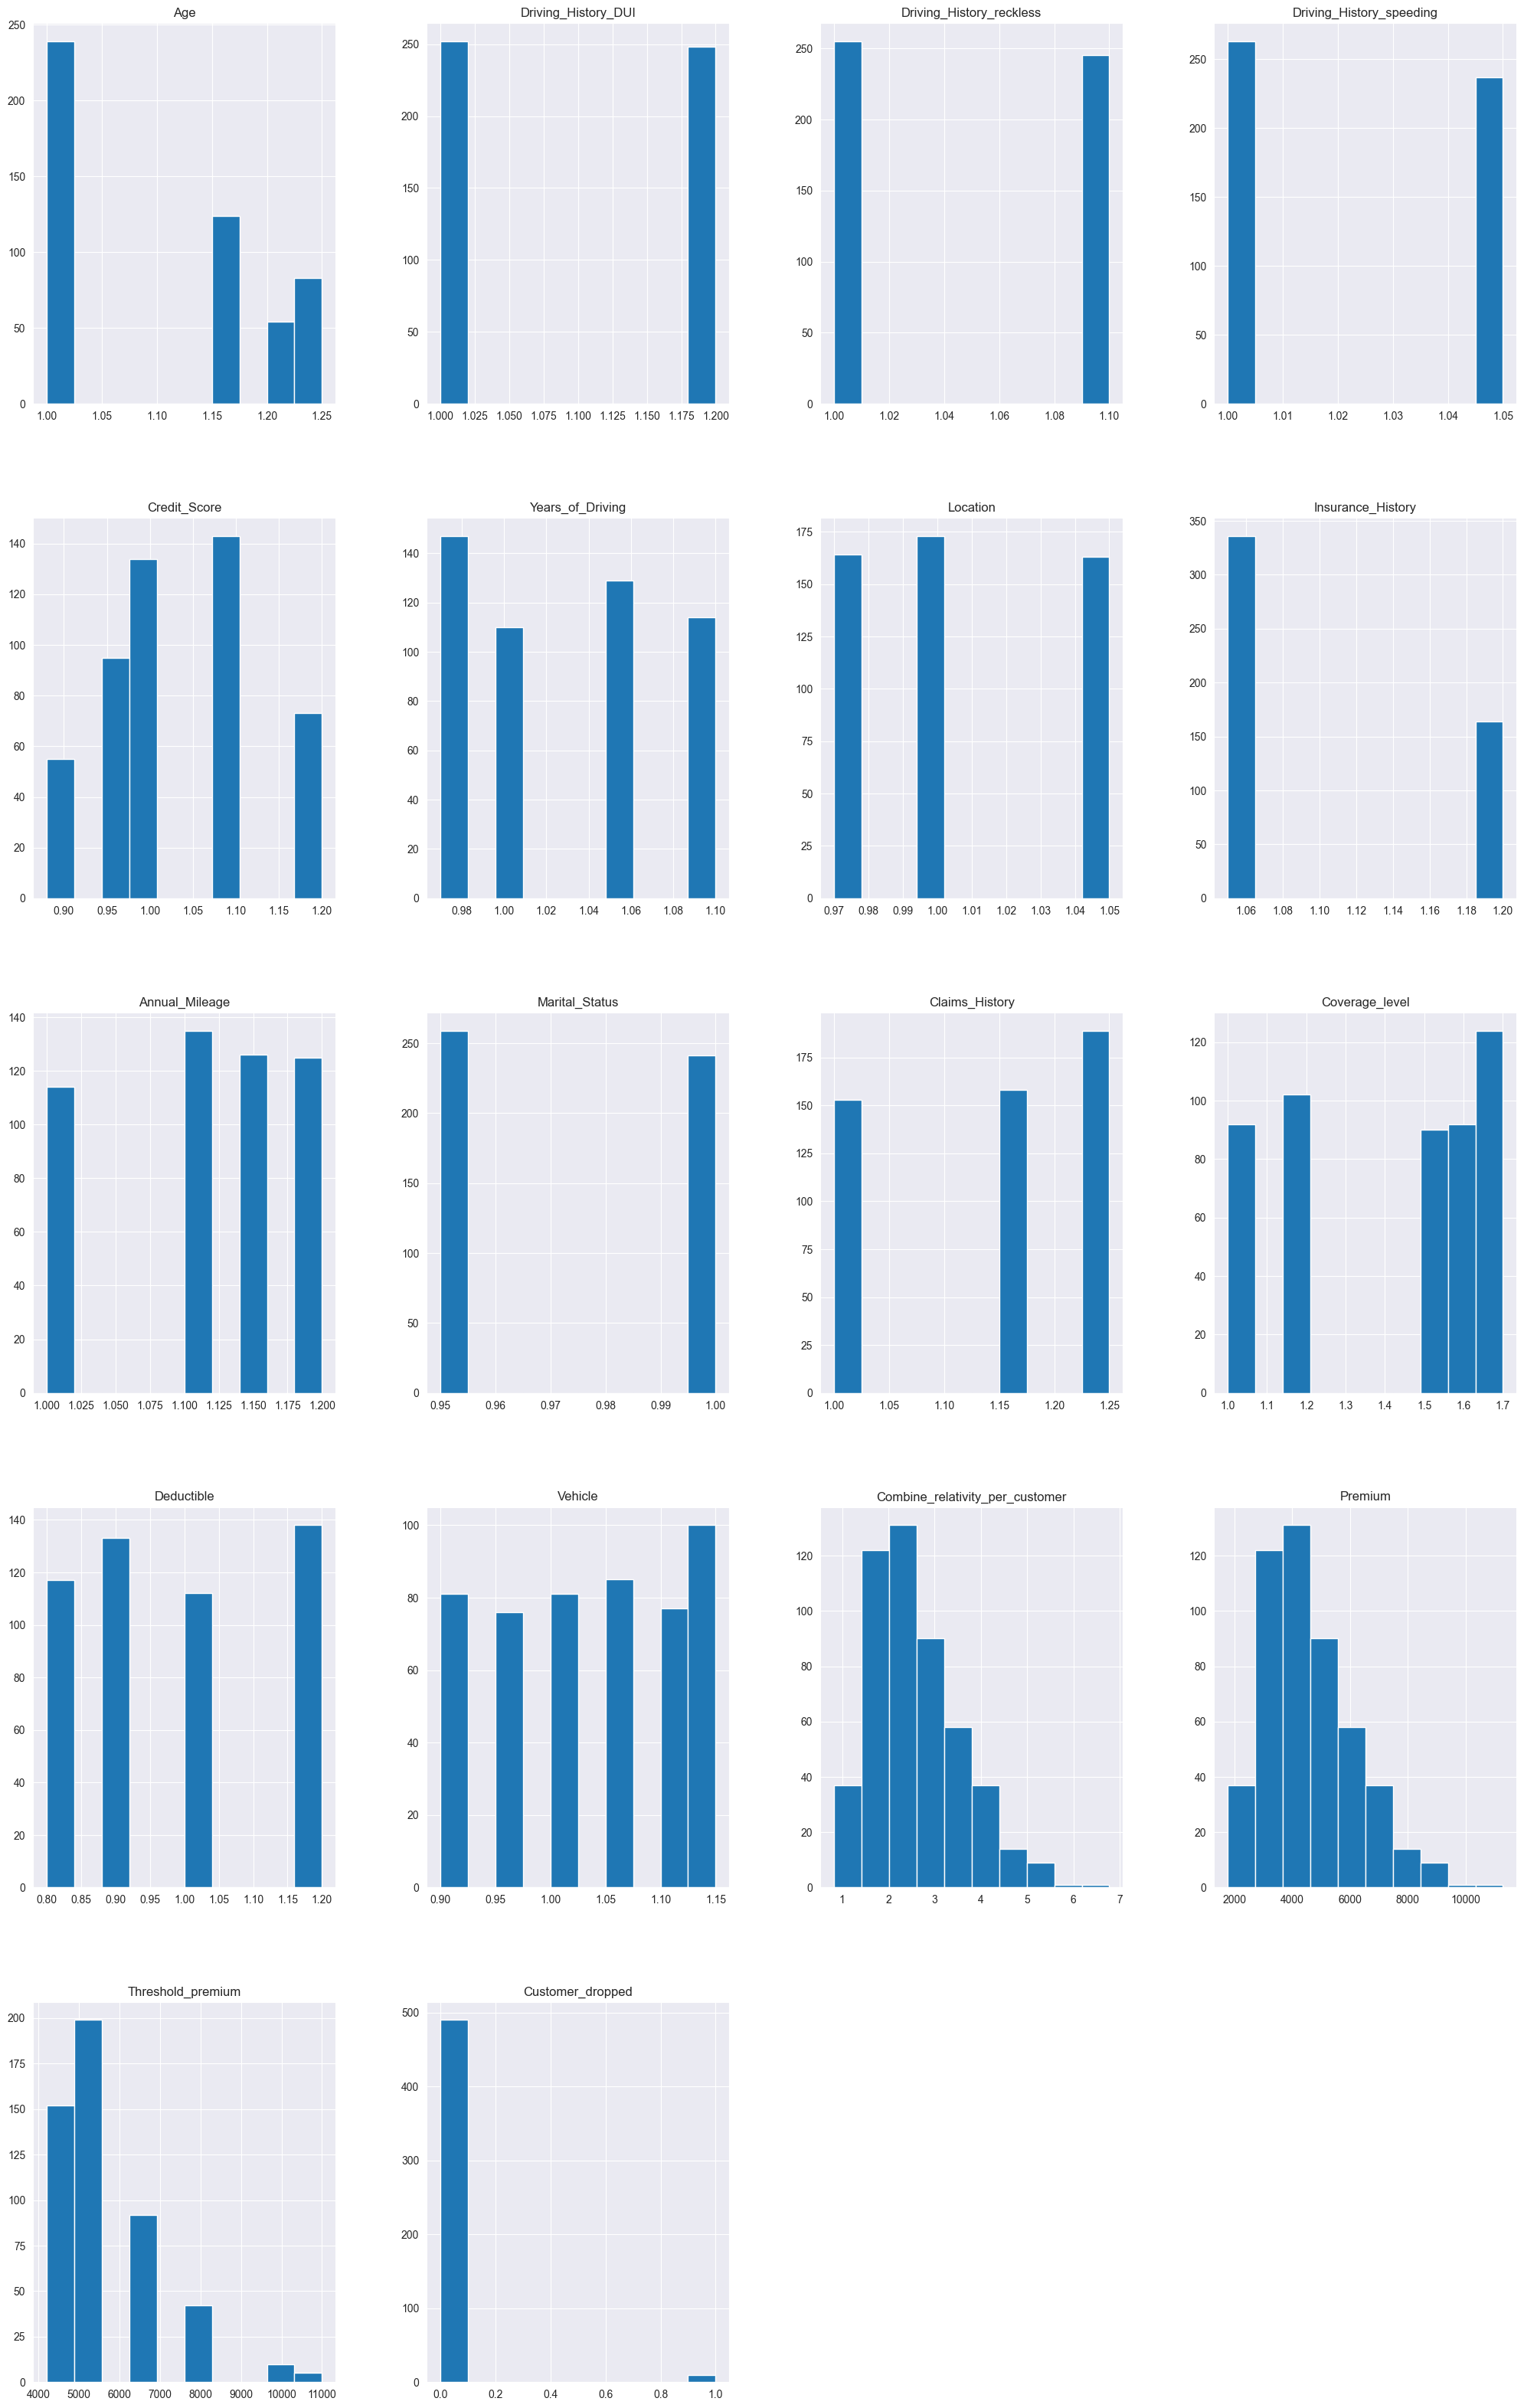

In [22]:
fig = plt.figure(figsize = (25,40))
ax = fig.gca()
data.hist(ax = ax);

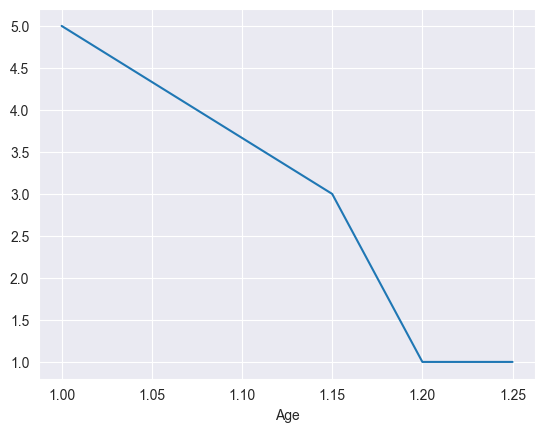

In [23]:
agewise_custdrop = data[data["Customer_dropped"] == 1]
agewise_custdrop = agewise_custdrop.groupby('Age')['Customer_dropped'].count()
agewise_custdrop.plot();

In [24]:
def premium_mean(col):
    agewise_premium = data.groupby(col)["Premium"].mean()
    plt.title("Premium mean values with respect to {}".format(col))
    plt.ylabel("Mean Premium")
    agewise_premium.plot();

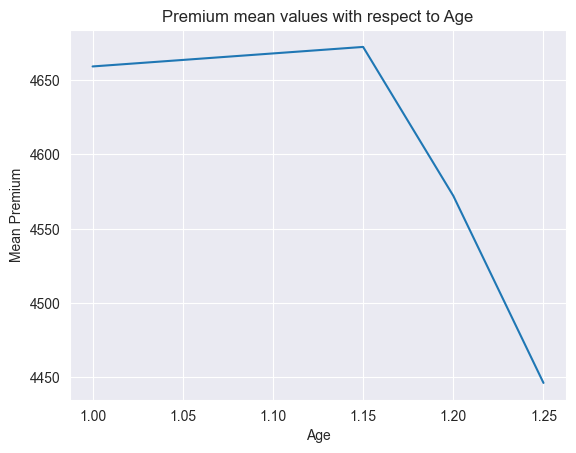

In [25]:
premium_mean("Age")

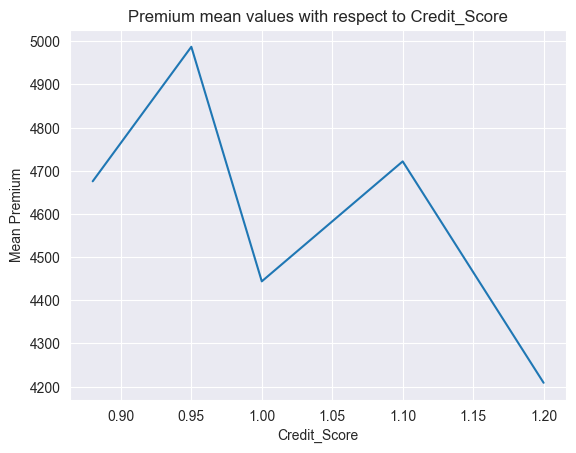

In [26]:
premium_mean("Credit_Score")

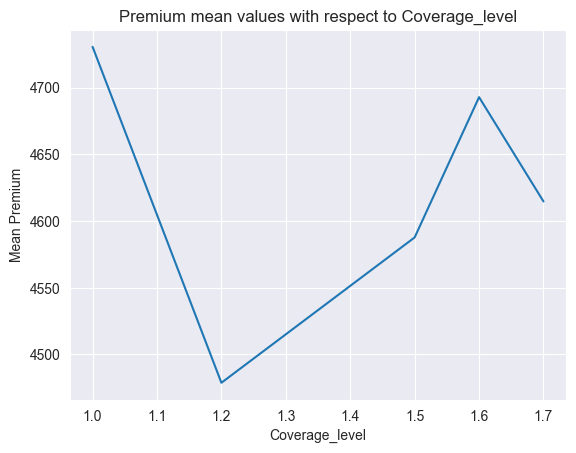

In [27]:
premium_mean("Coverage_level")

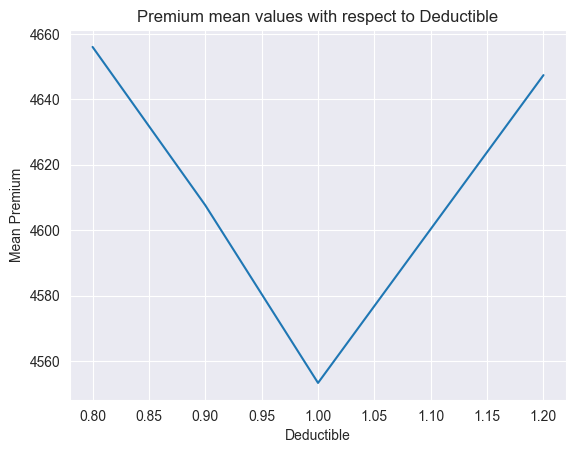

In [28]:
premium_mean("Deductible")

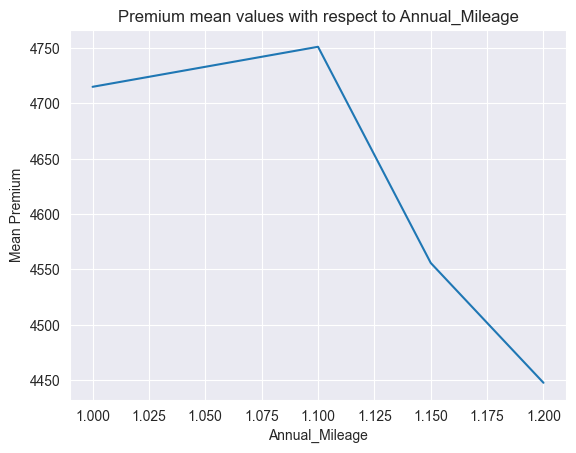

In [29]:
premium_mean("Annual_Mileage")

In [30]:
agg_dict

,Age,Driving_History_DUI,Driving_History_reckless,Driving_History_speeding,Credit_Score,Years_of_Driving,Location,Insurance_History,Annual_Mileage,Marital_Status,Claims_History,Coverage_level,Deductible,Vehicle,Combine_relativity_per_customer,Premium,Threshold_premium,Customer_dropped
0,1.00,1.0,1.0,1.00,1.10,1.00,1.05,1.05,1.20,0.95,1.25,1.5,0.9,1.05,2.395242,4282.387020,5120,0
1,1.00,1.0,1.0,1.00,0.95,0.97,0.97,1.05,1.00,0.95,1.25,1.6,0.8,0.90,1.994182,3640.691244,4200,0
2,1.25,1.2,1.1,1.00,1.20,1.10,1.00,1.20,1.00,1.00,1.00,1.5,1.0,0.95,3.148032,5486.851512,6800,0
3,1.15,1.0,1.0,1.05,0.88,1.05,1.00,1.20,1.20,1.00,1.15,1.5,0.9,1.15,2.247484,4045.974413,5120,0
4,1.00,1.2,1.0,1.05,1.00,1.05,1.00,1.05,1.15,0.95,1.15,1.0,1.2,0.95,1.083259,2183.214996,4200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.20,1.2,1.0,1.00,1.20,1.00,1.05,1.05,1.15,0.95,1.25,1.0,0.9,1.15,2.325785,4171.255715,5120,0
496,1.00,1.2,1.0,1.05,1.20,1.05,1.00,1.05,1.10,0.95,1.25,1.2,0.9,1.15,1.100551,2210.880983,4200,0
497,1.25,1.0,1.0,1.00,1.00,1.00,0.97,1.05,1.10,0.95,1.00,1.6,1.0,1.10,2.150663,3891.061274,5120,0
498,1.00,1.0,1.1,1.00,0.95,1.00,1.05,1.05,1.00,1.00,1.15,1.7,0.8,1.05,3.878376,6655.401063,6800,0


In [3]:
agg_dict

{'age': {'18-24 years': 61,
  '25-45 years': 211,
  '45-60 years': 146,
  '60+ years': 82},
 'driving_hist_dui': {'No': 251, 'Yes': 249},
 'driving_hist_reckless': {'No': 269, 'Yes': 231},
 'driving_hist_speeding': {'No': 238, 'Yes': 262},
 'credit_score': {'300-579': 65,
  '580-669': 146,
  '670-739': 154,
  '740-799': 90,
  '800-850': 45},
 'driving_exp': {'less than 1 year': 124,
  '1-5 years': 113,
  '6-15 years': 131,
  '15+ years': 132},
 'location': {'Urban': 162, 'Rural': 176, 'Suburban': 162},
 'insurance_hist': {'No coverage': 167,
  'Coverage (past 6 months)': 333,
  'Coverage (past 1 year)': 0},
 'annual_mileage': {'0-7500 miles': 118,
  '7500-10000 miles': 126,
  '10001-15000 miles': 128,
  '15000+ miles': 128},
 'marital_status': {'Married': 248, 'Single/Divorced/Widowed': 252},
 'claims_hist': {'Filed within last 1 year': 166,
  'Filed within last 1-3 years': 161,
  'No claims filed': 173},
 'coverage_level': {'25000': 96,
  '50000': 107,
  '100000': 101,
  '200000': 112

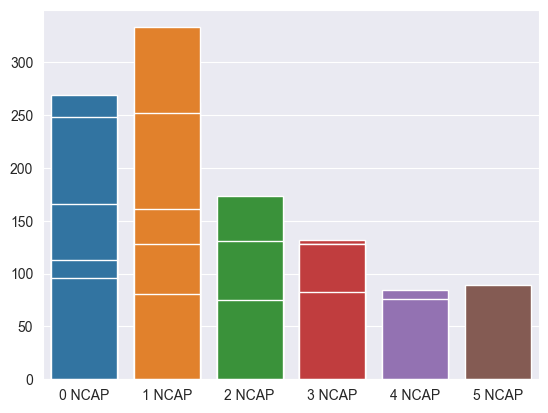

In [16]:
for variable in agg_dict:
    v = agg_dict[variable]
    # print(v.keys())
    # print(v.values())
    sns.barplot(x=list(v.keys()), y = list(v.values()))


In [17]:
#v = agg_dict['age']
agg_dict['age']

{'18-24 years': 61, '25-45 years': 211, '45-60 years': 146, '60+ years': 82}

<AxesSubplot: >

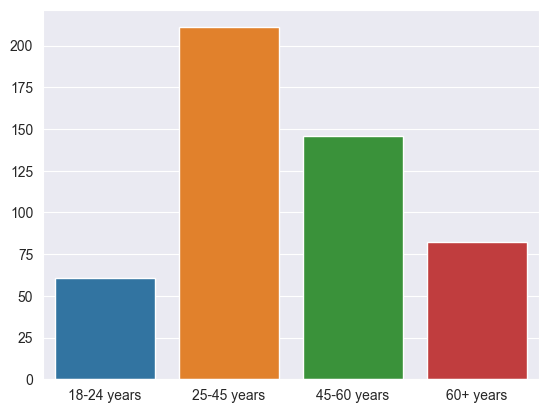

In [15]:
sns.barplot(x=list(v.keys()), y = [61,211,146,82])


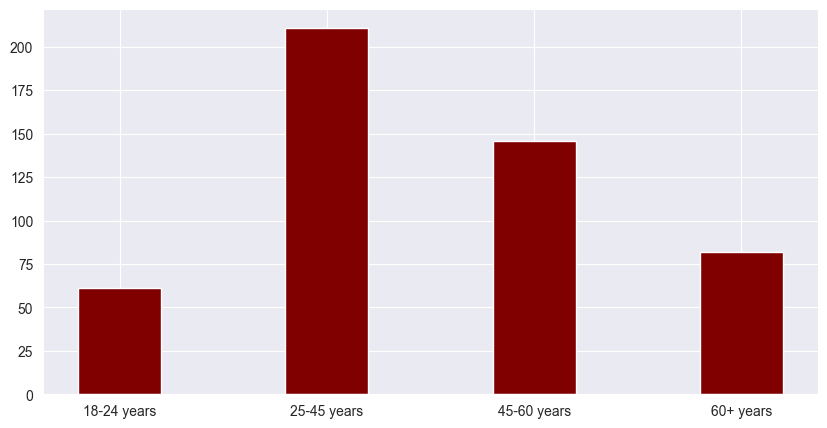

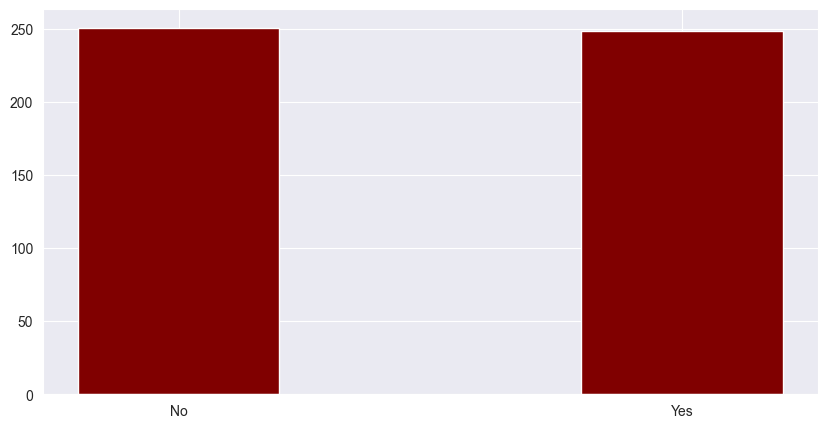

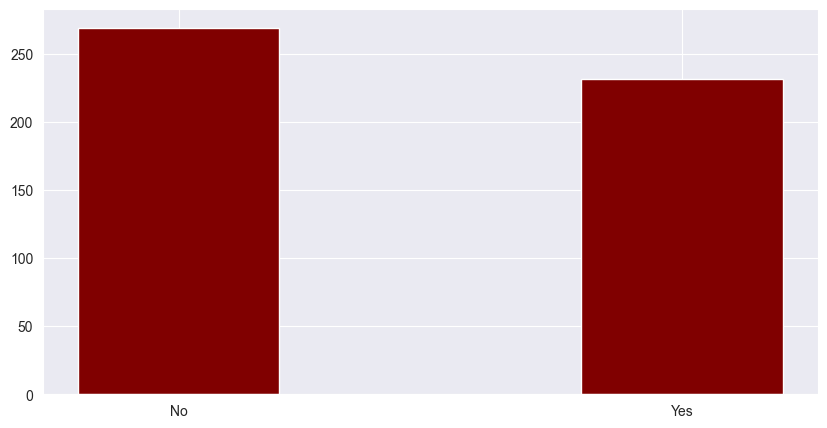

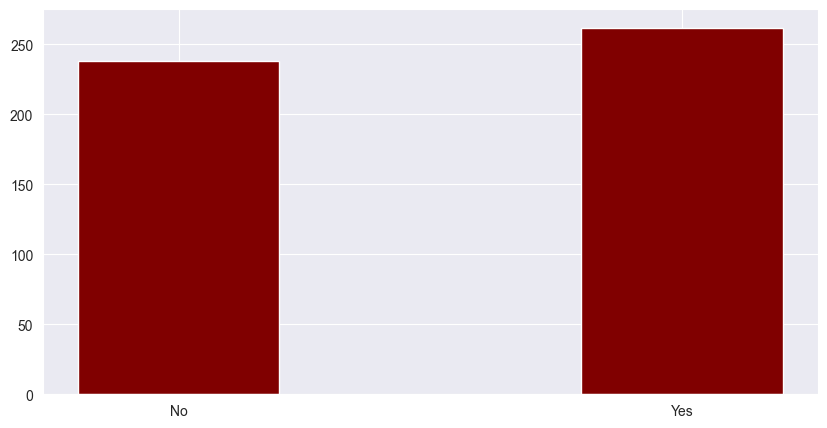

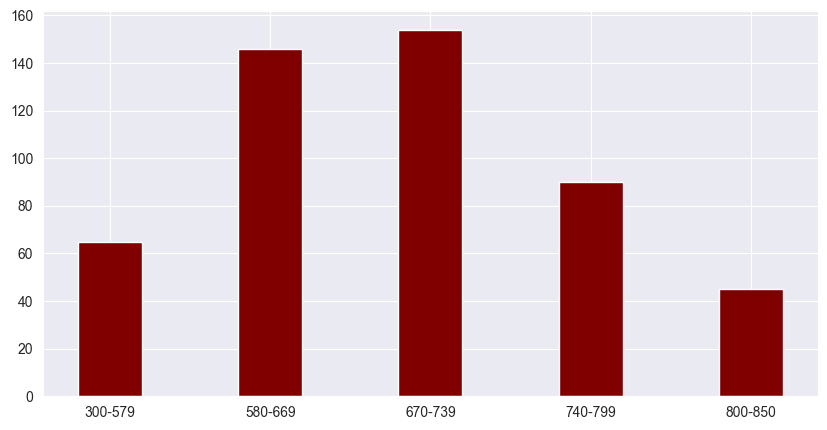

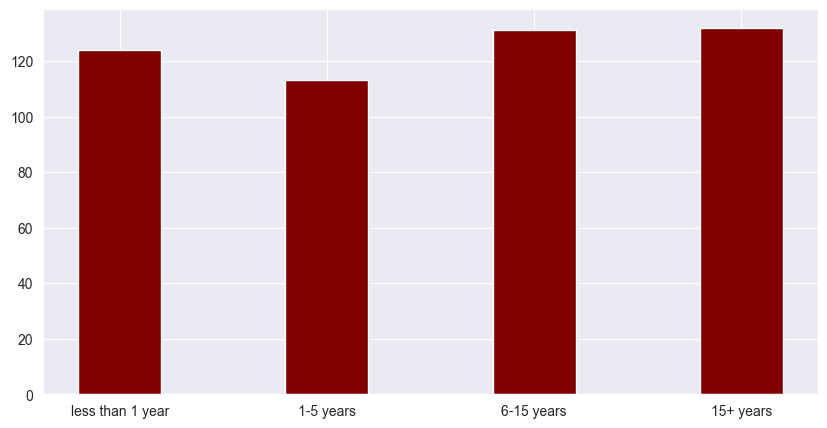

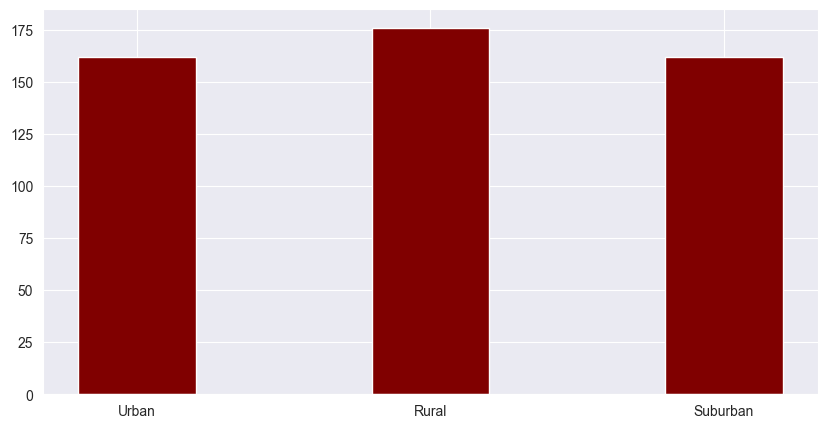

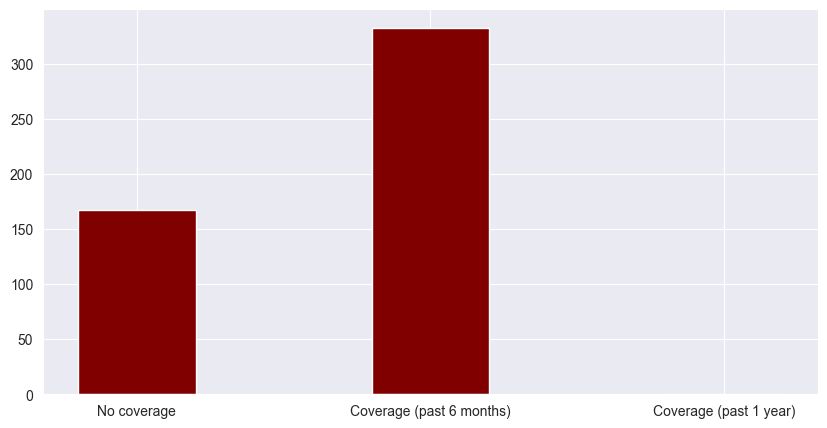

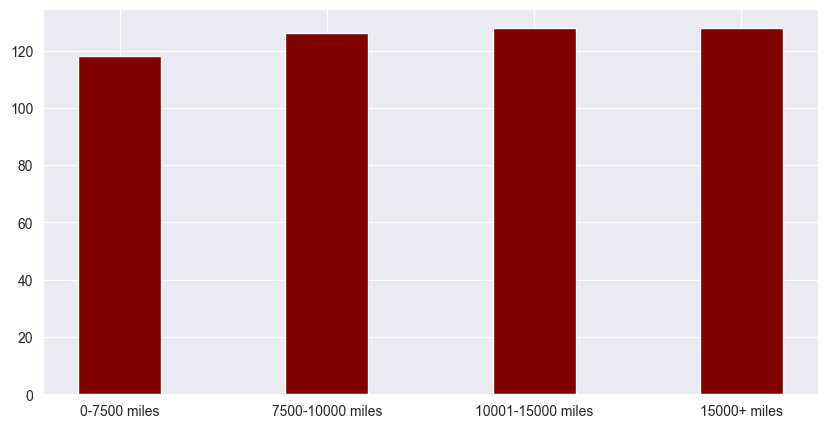

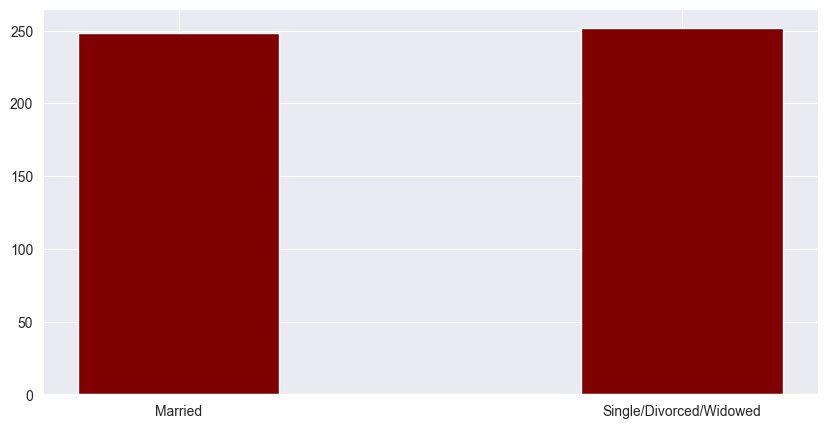

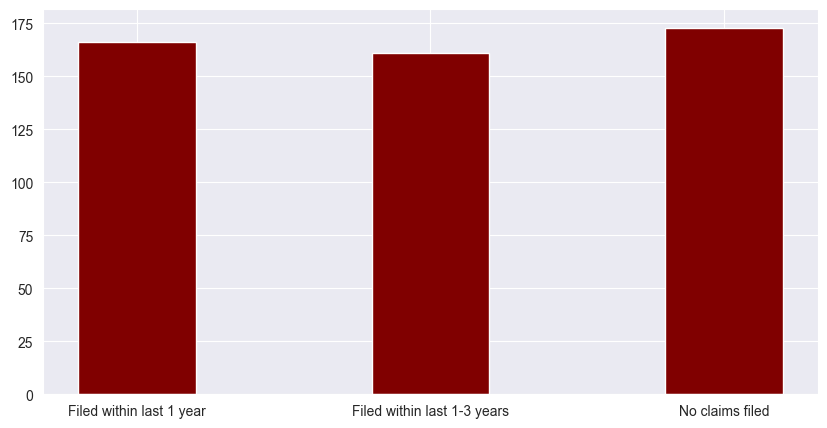

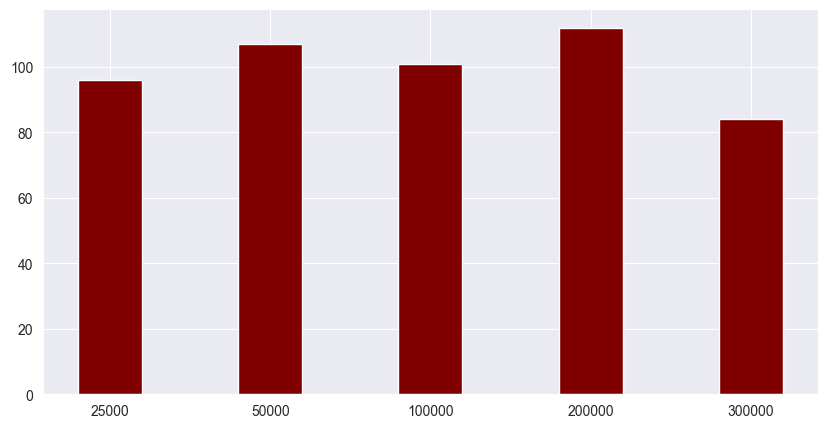

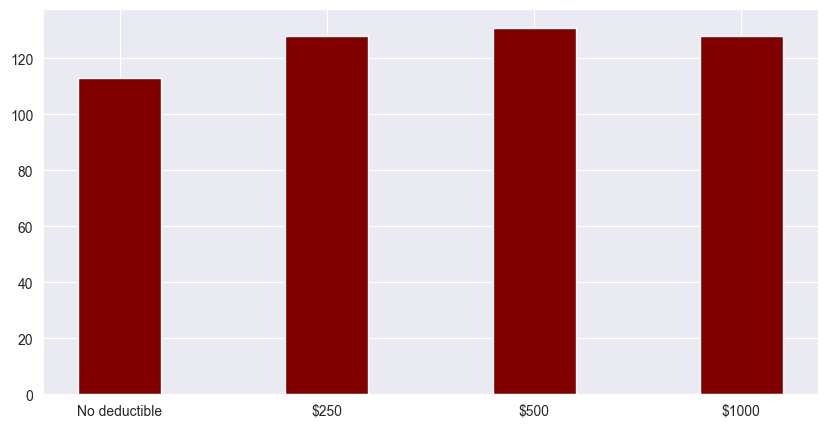

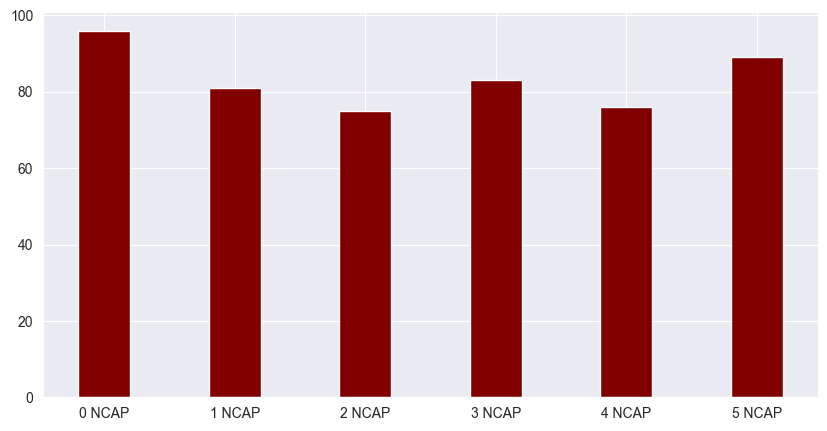

In [19]:
#fig = plt.figure(figsize = (10, 5))

for variable in agg_dict:
    v = agg_dict[variable]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(list(v.keys()),list(v.values()), color ='maroon',
        width = 0.4)